In [39]:
def convert_files11(sampling_file, command_file):

    if command_file.endswith("000"):
        print(command_file[-5:])

    with open(sampling_file, "r") as f:
        lines = f.readlines()

    if len(lines) < 100:
        return None


    X = [[int(l) for l in line[:-1]] for line in lines]

    #random.shuffle(out) #This will shuffle the rows
    with open(command_file, "r") as f:
        s = f.readlines()[0].split()

    if -0.01 < float(s[11]) < 0.01:
        return None
    
    if float(s[8]) < 0.05:
        return None

    # if 0.4 <= float(s[2]) <= 0.6:
    #     return None

    points = [float(s[6]), float(s[7]), float(s[10])]
    ind1, ind2, regular_ind = [round(num_samples*point - 0.5) for point in points]

    site1 = [sample[ind1] for sample in X]
    site2 = [sample[ind2] for sample in X]
    regular_site = [sample[regular_ind] for sample in X]

    for offset in range(1, sample_width // 2 + 1):
        site_prev = [sample[ind1 - offset] for sample in X] if ind1 - offset >= 0 else [1 for _ in range(len(X))]
        site_next = [sample[ind1 + offset] for sample in X] if ind1 + offset < num_samples else [1 for _ in range(len(X))]
        site1 = site_prev + site1 + site_next

        site_prev = [sample[ind2 - offset] for sample in X] if ind2 - offset >= 0 else [1 for _ in range(len(X))]
        site_next = [sample[ind2 + offset] for sample in X] if ind2 + offset < num_samples else [1 for _ in range(len(X))]
        site2 = site_prev + site2 + site_next

        site_prev = [sample[regular_ind - offset] for sample in X] if regular_ind - offset >= 0 else [1 for _ in range(len(X))]
        site_next = [sample[regular_ind + offset] for sample in X] if regular_ind + offset < num_samples else [1 for _ in range(len(X))]
        regular_site = site_prev + regular_site + site_next

    out_true = site1 + site2 if random.random() < 0.5 else site2 + site1

    ep_site = site1 if random.random() < 0.5 else site2
    # ep_site = site2

    out_false = ep_site + regular_site

    return [out_true, out_false]


In [40]:
from processing import *
import models
import torch

train_prop = 0.9
num_files = 100_000
data_dir = "../Data3"
max_batch_size = 128
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Load data from test indices
X = [convert_files11(data_dir + "/sampled_genotypes/sample_" + str(i), data_dir + "/commands/command_" + str(i)) for i in range(10_000)] 
X = [x for x in X if x is not None]

X = torch.tensor(X) - 1
X = X.reshape(-1, sample_width*num_chrom * 2)


cuda
_1000
_2000
_3000
_4000
_5000
_6000
_7000
_8000
_9000


In [44]:
print(X.shape)

torch.Size([9970, 110])


In [42]:
X = X.reshape(-1, 2*sample_width,100)

In [43]:
X = X.sum(axis=2)

In [45]:
X = abs(X)

In [46]:
Xt = X[::2]
Xf = X[1::2]

In [54]:

import matplotlib.pyplot as plt

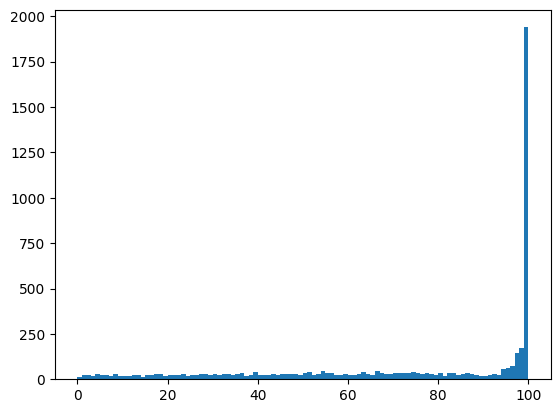

In [63]:

plt.hist(Xt[:,-28],100)
plt.show()

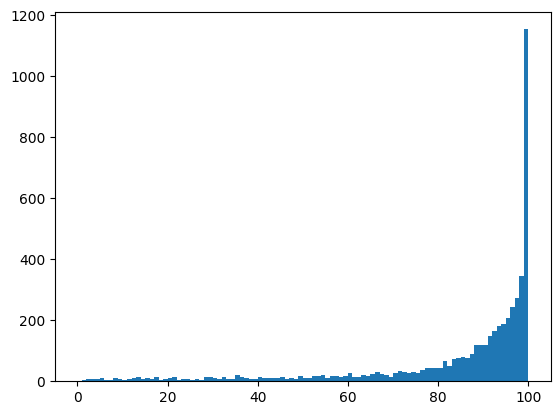

In [61]:
plt.hist(Xf[:,-28],100)
plt.show()